**Before you start**<br>
Change runtime type to GPU <br>
Runtime > Change runtime type > GPU > Save

Install fastai

In [1]:
!pip install -Uqq fastbook
from fastai.vision.all import *
from IPython.display import Image 

     |████████████████████████████████| 720 kB 12.0 MB/s 
     |████████████████████████████████| 1.2 MB 44.4 MB/s 
     |████████████████████████████████| 186 kB 50.9 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 51 kB 354 kB/s 


Downlaod data set

In [2]:
path = untar_data(URLs.PETS)/'images'
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

Check images

In [3]:
path.ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_105.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_79.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_117.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_185.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_44.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_130.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_69.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_23.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_71.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_13.jpg')...]

In [25]:
len(path.ls(file_exts='.jpg'))

7390

Thats a lot of files...

In [9]:
from random import sample,randrange

In [26]:
image_count = 500
short_list = sample(path.ls(file_exts='.jpg'),image_count)
len(short_list)

500

In [27]:
verify_images(short_list)

(#0) []

Show a test image

/root/.fastai/data/oxford-iiit-pet/images/leonberger_169.jpg


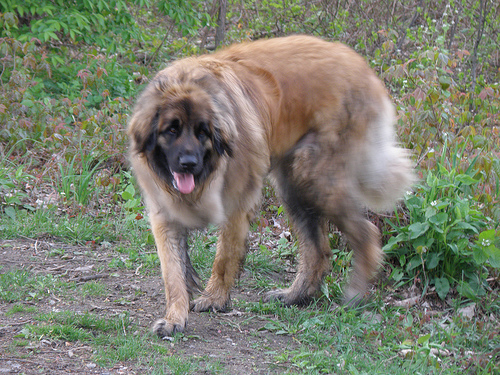

In [28]:
img_number = randrange(0,image_count)
print(short_list[img_number])
Image(str(short_list[img_number]))

Define func to label images

In [29]:
def is_cat(x): return x[0].isupper()

Load data

In [30]:
dls = ImageDataLoaders.from_name_func(
    path, short_list, valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

Train model

In [31]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.941647,0.369887,0.100000,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.184097,0.342145,0.100000,00:05
1,0.131595,0.143825,0.060000,00:05
2,0.094907,0.094521,0.060000,00:05


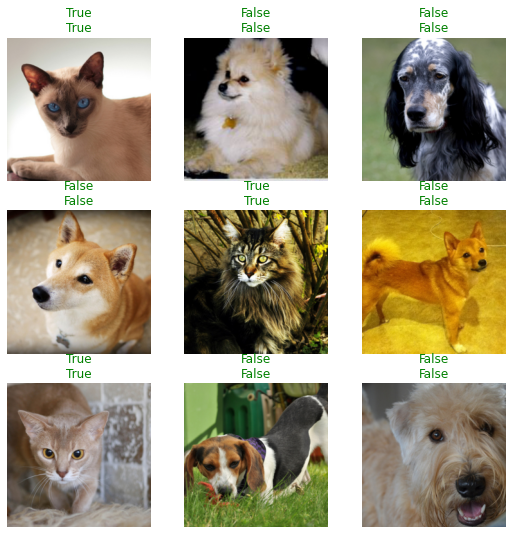

In [32]:
learn.show_results()

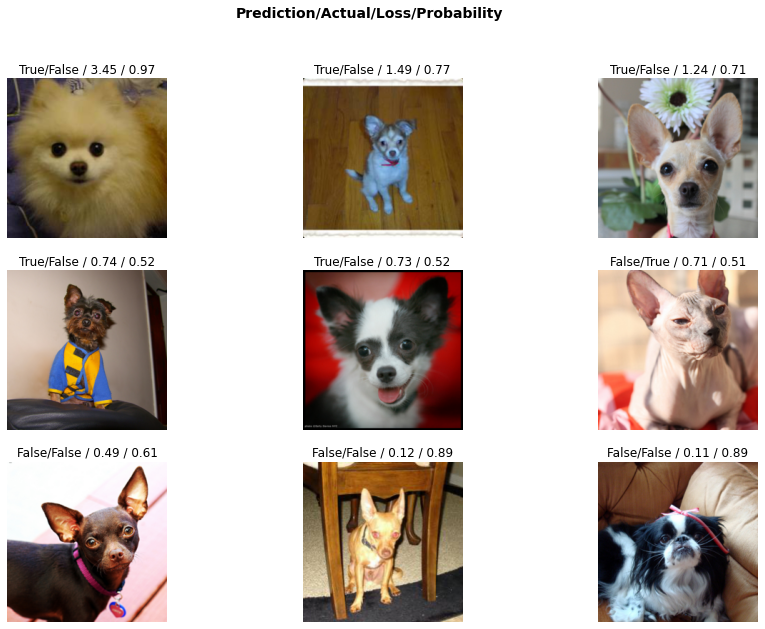

In [33]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

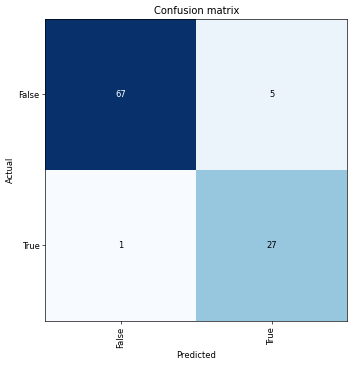

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [48]:
test_img_url = 'https://raw.githubusercontent.com/DPIRD-DMA/Python_intro/master/Resources/image_1.jpeg'

In [49]:
file_name = os.path.basename(test_img_url)
file_name

'image_1.jpeg'

In [50]:
import requests

img_data = requests.get(test_img_url).content
with open(file_name, 'wb') as handler:
    handler.write(img_data)

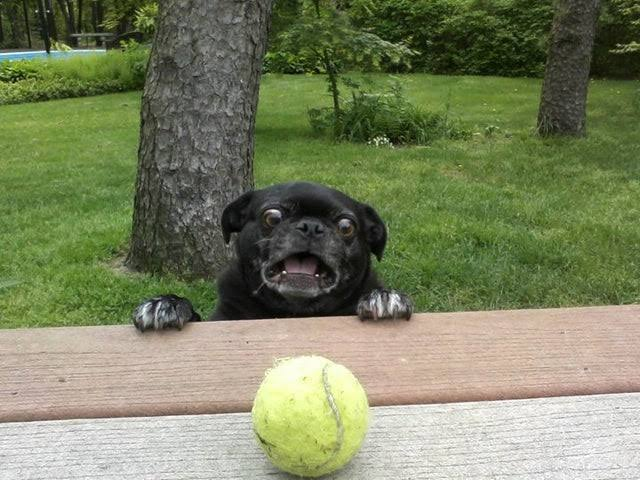

In [51]:
Image(file_name)

In [52]:
learn.predict(file_name)

('False', tensor(0), tensor([9.9977e-01, 2.3321e-04]))